# Разведочный анализ данных (exploratory data analysis, EDA)

# Подготовка

### Импорты

In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy
import scipy.stats as stats

In [3]:
import sklearn.linear_model as lm

In [4]:
import json

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import re

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Опции

In [9]:
pd.set_option('display.float_format', '{:,.2f}'.format)
# разделитель ',' и два знака после запятой у чисел с плавающей точкой

In [ ]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

In [ ]:
# Сброс ограничений на число столбцов
pd.reset_option('display.max_columns')

In [ ]:
pd.set_option('display.max_colwidth', None)
# Установите для отображения самой большой линии

In [ ]:
pd.reset_option('display.max_colwidth')
# Сброс ограничений на количество символов в записи

#### опции для графики

In [10]:
large = 16; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (12, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

In [11]:
sns.set_palette('deep') 
sns.set_style("whitegrid")

## Заливка данных

In [ ]:
# полный датафрейм со всеми столбцами
# full_df = pd.read_csv('region_roles_26.05.22_CSV.csv', encoding='windows-1251', sep=';')

#### Что в столбцах?

In [ ]:
df.premium.value_counts()
# удалить

In [ ]:
df.name.value_counts()

In [ ]:
df.department.value_counts()
# delete

In [ ]:
df.has_test.value_counts()
# delete

In [ ]:
df.response_letter_required.value_counts()
# delete

In [ ]:
df.area.value_counts()
# delete

In [ ]:
df.salary.value_counts()

In [ ]:
df.type.value_counts()
# delete

In [ ]:
df.address.value_counts()
# delete

In [ ]:
df.response_url.value_counts()
# delete

In [ ]:
df.sort_point_distance.value_counts()
# delete

In [ ]:
df.archived.value_counts()
# delete

In [ ]:
df.insider_interview.value_counts()
# delete

In [ ]:
df.url.value_counts()
# delete

In [ ]:
df.alternate_url.value_counts()
# delete

In [ ]:
df.relations.value_counts()
# delete

In [ ]:
df.employer.value_counts()
# delete

In [ ]:
df.snippet.value_counts()
# delete не нужен для целей исследования

In [ ]:
df.contacts.value_counts()
# delete

In [ ]:
df.schedule.value_counts()


In [ ]:
df.working_days.value_counts()
# delete

In [ ]:
df.working_time_intervals.value_counts()
# delete

In [ ]:
df.working_time_modes.value_counts()
# delete

In [ ]:
df.accept_temporary.value_counts()
# delete

In [ ]:
df.experience.value_counts()

In [ ]:
df.region.value_counts()

In [ ]:
df.immediate_redirect_url.value_counts()
# delete

#### Cокращенный dataframe

In [12]:
list_columns = [
    'id',
    'name',
    'salary',
    'experience',
    'schedule',
    'key_skills',
    'specializations',
    'region'
]

In [13]:
# dataframe после анализа содержимого столбцов
df = pd.read_csv('region_roles_26.05.22_CSV.csv', usecols=list_columns, encoding='windows-1251', sep=';')

3,7s

# EDA (3 этапа)

## 1. Первичный анализ датасета

- Знакомимся с таблицей данных
- Оцениваем ее объем
- Оцениваем признаки объектов, хранящихся в ней
- Выявляем наличие пропусков

### общая информация

In [11]:
df.head(2)

,id,name,salary,schedule,experience,key_skills,specializations,region
0,50632962,Консультант по информационной безопасности,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва
1,49062175,Product Manager (Разработка ПО в сфере Информа...,NaN,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Информационная безопасность'}, {'na...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Москва


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               69656 non-null  int64 
 1   name             69656 non-null  object
 2   salary           37590 non-null  object
 3   schedule         69656 non-null  object
 4   experience       69656 non-null  object
 5   key_skills       69656 non-null  object
 6   specializations  69656 non-null  object
 7   region           69656 non-null  object
dtypes: int64(1), object(7)
memory usage: 4.3+ MB


In [13]:
df.shape

(69656, 8)

In [14]:
df.isna().sum()
# поиск пропущенных значений

id                     0
name                   0
salary             32066
schedule               0
experience             0
key_skills             0
specializations        0
region                 0
dtype: int64

In [15]:
# список столбцов в виде list()
df.columns.tolist()

['id',
 'name',
 'salary',
 'schedule',
 'experience',
 'key_skills',
 'specializations',
 'region']

### Есть дубликаты?

In [8]:
df.duplicated().sum()

233

In [ ]:
df[df.duplicated() == True]

удаляем дубликаты

In [14]:
df = df.drop_duplicates()

### Преобразовываем строку JSON

json.loads
Считывание строки в формате JSON в объект Python

json.dumps
Преобразование объекта в строку в формате JSON. Функция dumps() модуля json сериализирует объект Python obj в строку str формата JSON. Сериализация объектов Python выполняется согласно таблице преобразования

In [15]:
# Преобразование json с dumps
def text_to_json_dumps(text):
    text = text.replace("'", '"')
    try:
        return json.loads(json.dumps(text))
    except:
        print('error')

In [10]:
# Преобразование json с заменой подстроки
def text_to_json_str(text):
    try:
        return json.loads(text.replace('"', '').replace("'", '"'))
    except:
        print('error')
        # return []

### Очищаем dataframe от данных, не относящихся к IT

In [16]:
# для упрощения обработки приводим строки к нижнему регистру
df['name'] = df['name'].str.lower()

In [22]:
df.name[:3]

0           консультант по информационной безопасности
1    product manager (разработка по в сфере информа...
2               эксперт по компьютерной криминалистике
Name: name, dtype: object

Создаем список подстрок, не относящихся к IT-специализации

In [28]:
lst_not_it = [
    'недви',
    'персон', 
    'кадр',
    'рекру',
    'hr',
    'продаж',
    'риэл',
    'риел',
    'контент',
    'зал',
    'артист',
    'smm',
    'инструкт',
    'тренер',
    'креатив',
    'ретуш',
    'аренд',
    'псих',
    'табел',
    'лаборат',
    'смет',
    'менеджер по работе с клиентами',
    'компенсац',
    'обуч',
    'помещен',
    'межев',
    'ипоте',
    'маркетол',
    'блогер',
    'кдп',
    'recruiter',
    'труд',
    'специалист по работе с клиентами',
    'штат',
    'продавец',
    'офис',
    'брокер',
    'смм',
    'ресеч',
    'торг',
    'менедж',
    'воин',
    'новострой',
    'pr',
    'маркетинг',
    'реклам',
    'арт',
    'агент',
    'строи',
    'энергет',
    'табель',
    'плав',
    'интерьер', 
    'бокс'
    ]


Сепарируем столбец 'name' на 2 dataframe: 1) с наименованиями из списка 2) остальное

In [29]:
pat = '|'.join(lst_not_it)
temp_df = df[df['name'].str.contains(pat)]
df = df[~df.index.isin(temp_df.index)]

In [30]:
df.shape

(45006, 11)

Работаем со столбцом specializations, чтобы очистить dataframe от данных, не относящихся к IT, что позволит точнее провести описательную статистику

In [19]:
df.specializations[0]

"[{'id': '1.110', 'name': 'Компьютерная безопасность', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.113', 'name': 'Консалтинг, Аутсорсинг', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

Преобразуем данные json и сохраним их в столбце specializations_jsn

In [31]:
df['specializations_jsn'] = df['specializations'].apply(text_to_json_dumps)

Создаем функцию, вытаскивающую тег 'profarea_id'. Это Идентификатор профессиональной области, в которую входит специализация. 1 - Информационные технологии, интернет, телеком

In [32]:
def get_tag_profarea_id(text):
    text = json.loads(text)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['profarea_id'])
            return out
    except:
        print('error')


Создаем новый столбец 'profarea_id'

In [33]:
df['profarea_id'] = df.specializations_jsn.apply(get_tag_profarea_id)

Создаем функцию поиска элемента '1' в списке для того, чтобы сепарировать строки dataframe со специализацией 1 - Информационные технологии, интернет, телеком

In [34]:
def find_1(lst):
    return '1' in lst

Создаем столбец 'profarea_id_1'

In [35]:
df['profarea_id_1'] = df['profarea_id'].apply(find_1)

Разделяем dataframe по признаку отношения специализации к IT

In [41]:
df = df[df['profarea_id_1'] == 1]

In [42]:
df.shape

(44203, 11)

In [37]:
it_false = df[df['profarea_id_1'] == 0]

In [38]:
it_false.shape

(803, 11)

## 2. Анализ и визуализация отдельных колонок

Пытаемся сформулировать вопросы для колонок и ответить на них, используя
- описательная статистика
- выбросы, аномалии
- сортировка
- визуализация

### Работаем со столбцом salary

🎯 Цель: получить столбец **'salary_from_ru'** в формате int <br>
Надо вытащить данные по salary from и привести все данные к рублевому эквиваленту. Сделать описательную статистику, визуализацию, посмотреть выбросы, аномалии.

In [38]:
df.salary[3]

"{'from': 26000, 'to': None, 'currency': 'RUR', 'gross': True}"

вытаскиваем тег 'from' из salary

In [43]:
def salary_from(salary):
    if pd.isna(salary): # добавляем обработку None
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

вытаскиваем тег 'currency' из salary

In [44]:
def salary_currency(salary):
    if pd.isna(salary): # добавляем обработку None
        clean_salary = np.nan
    else:
        clean_salary = salary.replace("{", '').replace("}", '').split(',')[2][12:]
        if clean_salary == 'None':
            clean_salary = np.nan

    return clean_salary

In [45]:
df['salary_currency'] = df.salary.apply(salary_currency)

In [46]:
df['salary_from'] = df.salary.apply(salary_from)

In [47]:
df['salary_from'] = pd.to_numeric(df['salary_from'])

In [78]:
df[df.salary_from == 0]

,id,name,salary,schedule,experience,key_skills,specializations,region,specializations_jsn,profarea_id,profarea_id_1,salary_currency,salary_from,salary_temp,salary_from_ru


приводим все salary_from в рубли

In [48]:
def get_rate(currency):
    rur =  1
    doll = 70
    eur = 75
    kzt = 0.13
    if currency is np.nan:
        return np.nan
    else:
        if currency.find('RUR') >= 0:
            return rur
        elif currency.find('USD') >= 0:
            return doll
        elif currency.find('EUR') >= 0:
            return eur
        elif currency.find('KZT') >= 0:
            return kzt

In [49]:
df['salary_temp'] = df.salary_from * df.salary_currency.apply(get_rate)

проверка

In [50]:
df[['salary_from', 'salary_currency', 'salary_temp']].sort_values('salary_currency', ascending=False)[:5]

,salary_from,salary_currency,salary_temp
38225,NaN,'USD',NaN
30992,"4,000.00",'USD',"280,000.00"
27350,"2,500.00",'USD',"175,000.00"
24051,"2,000.00",'USD',"140,000.00"
27360,"1,200.00",'USD',"84,000.00"


Выбираем на что менять NaN в столбце 'salary_ru'

In [51]:
(
    df.salary_temp.mean(),
    df.salary_temp.median(),
    df.salary_temp.min(),
    df.salary_temp.max()
)

(85367.78599420685, 65000.0, 25.0, 1000000.0)

Медиана меньше зависима от выбросов и лучше подходит для заполнения ячеек NaN

In [52]:
agg_func_math_ = {
    'salary_temp': ['median']
}
# задаем список функций по определенному столбцу с расчетными данными

region_salary_ru = df.groupby('region', dropna=True).agg(agg_func_math_).round(2).fillna(0)
# включаем строки с NaN при расчете: dropna=False

переименовываем столбец

In [53]:
region_salary_ru.columns = ['_'.join(col).strip() for col in region_salary_ru.columns.values]

Заджойним region_salary_ru в df

In [54]:
df = df.merge(region_salary_ru, on='region', how='inner')

In [55]:
df.salary_temp.isna().sum()

26596

In [58]:
df.salary_temp.median()

76000.0

Так как медианные зарплаты различаются по регионам. Будем ячейки NaN в колонке 'salary_ru' заменять на медианную зарплату с учетом региона

In [56]:
df.loc[(df.salary_temp.isna()), 'salary_temp'] = df.salary_temp_median

переименуем столбец

In [57]:
df = df.rename(columns={'salary_temp_median': 'salary_from_ru'})

In [44]:
df.salary_from_ru.isna().sum()

0

In [44]:
df.salary_from_ru.median()

60000.0

у нас есть 4 строки с нулевыми зарплатами. Это связано с тем, что по данным регионам (Чукотка, Ненецкий АО) не было данных по зарплате. Уберем эти строки из dataframe

In [86]:
df[df.salary_from_ru == 0].shape

(4, 15)

In [87]:
df = df[df.salary_from_ru != 0]

In [88]:
df.shape

(44199, 15)

📌 После заполнения пустых ячеек медиана по зарплате снизилась с 76000 р. до 65000. Это говорит о том, что пустые ячейки по зарплатам были в регионах с более низким уровнем зарплаты. И после того, как эти ячейки были заполнены, они повлияли на итоговый результат.

In [89]:
df.salary_from_ru.describe()

count    44,199.00
mean     72,098.68
std      22,879.05
min      20,500.00
25%      50,000.00
50%      65,000.00
75%     100,000.00
max     100,000.00
Name: salary_from_ru, dtype: float64

/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


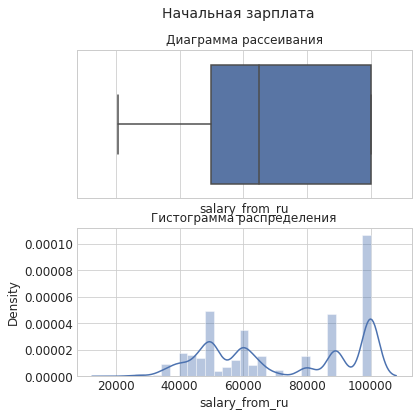

In [90]:
f, ax = plt.subplots(2,1, figsize=(6, 6), sharex=True)
ax[0].set_title('Диаграмма рассеивания')
ax[1].set_title('Гистограмма распределения')
sns.boxplot(df.salary_from_ru, ax=ax[0])
sns.distplot(df.salary_from_ru, ax=ax[1])
plt.suptitle('Начальная зарплата', size=14)
plt.show()

зарплат больше 100000 руб. нет.

In [91]:
df[df.salary_from_ru > 100000].shape

(0, 15)

📌 По графику видно, что распределение не нормальное и имеет несколько пиков. Верхний квартиль совпадает с максимальным значением выборки. Выбросов нет.

диапазон зарплат

In [95]:
df['band_salary'] = 0
for i in range(len(df.salary_from_ru)):
    if df.salary_from_ru[i] > 0 and df.salary_from_ru[i] < 50000:
        df['band_salary'][i] = 'до 50 т.р.'
    elif df.salary_from_ru[i] >= 50000 and df.salary_from_ru[i] < 65000:
        df['band_salary'][i] = 'от 50 до 65 т.р.'
    elif df.salary_from_ru[i] >= 65000:
        df['band_salary'][i] = 'от 65 т.р.'

/tmp/ipykernel_459/3333629495.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['band_salary'][i] = 'от 65 т.р.'


In [97]:
df.band_salary.value_counts()

от 65 т.р.          22952
от 50 до 65 т.р.    13927
до 50 т.р.           7320
Name: band_salary, dtype: int64

In [101]:
df.groupby('band_salary')['salary_from_ru'].median()

band_salary
до 50 т.р.          42,700.00
от 50 до 65 т.р.    55,000.00
от 65 т.р.         100,000.00
Name: salary_from_ru, dtype: float64

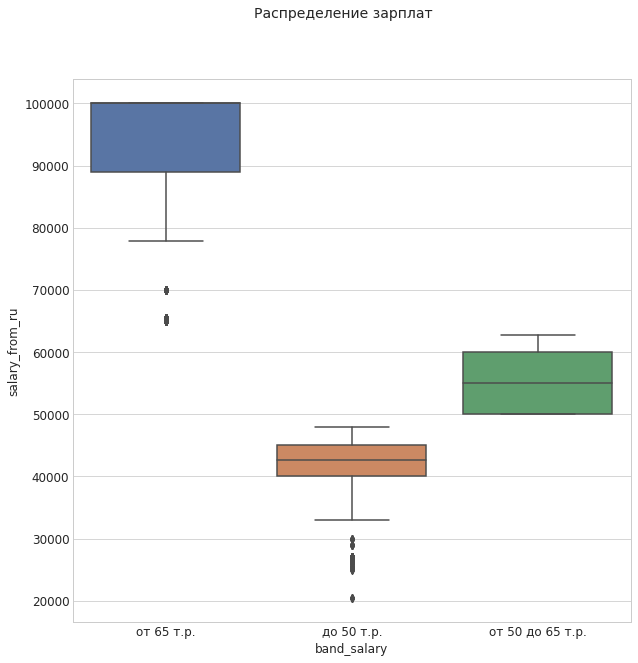

In [98]:
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x='band_salary', y='salary_from_ru', data=df)
plt.suptitle('Распределение зарплат', size=14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

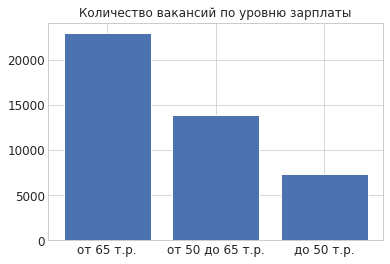

In [103]:
plt.bar(
    df.band_salary.value_counts().index,
    df.band_salary.value_counts().values
)
plt.title('Количество вакансий по уровню зарплаты')
plt.show

📌 Больше всего вакансий с зарплатами от 65 тыс.руб. При этом медиана зарплаты по данной группе составляет 100 тыс.руб. То есть количество вакансий с начальными зарплатами в размере 100 тыс.руб. сопоставимо с количеством вакансий по другим группам.

#### ТОП10 (⬆⬇) регионов по уровню медианы начальной зарплаты

In [132]:
region_salary_ru.sort_values('salary_temp_median', ascending=False)[:10]

,salary_temp_median
region,
Москва,"100,000.00"
Санкт-Петербург,"89,000.00"
Республика Адыгея,"80,000.00"
Новосибирская область,"80,000.00"
Магаданская область,"77,879.00"
Томская область,"70,000.00"
Ленинградская область,"65,546.00"
Свердловская область,"65,000.00"
Московская область,"62,750.00"


In [133]:
region_salary_ru.sort_values('salary_temp_median', ascending=True)[:10]

,salary_temp_median
region,
Ненецкий АО,0.00
Чукотский АО,0.00
Республика Ингушетия,"20,500.00"
Республика Алтай,"25,000.00"
Республика Северная Осетия-Алания,"25,500.00"
Кабардино-Балкарская республика,"26,000.00"
Чеченская республика,"26,500.00"
Карачаево-Черкесская Республика,"26,500.00"
Астраханская область,"27,000.00"


In [134]:
region_salary_ru.describe()

,salary_temp_median
count,84.00
mean,"46,104.71"
std,"16,128.42"
min,0.00
25%,"36,687.50"
50%,"45,750.00"
75%,"51,500.00"
max,"100,000.00"


📌 Москва прогнозируемо на первом месте. Республики Северного Кавказа среди аутсайдеров, за исключением Адыгеи, которая попала в лидеры (скорее всего, причина этого, в какой-то разовой вакансии с высоким уровнем зарплаты). 
Средняя медиана зарплат по стране составляет 46 тыс.руб.

### Анализируем количество и частоту специализаций

🎯 Цель: создать таблицу **'specializations_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. 

#### Агрегируем данные по тегу name колонки 'specializations'

In [51]:
df.specializations[0]

"[{'id': '1.110', 'name': 'Компьютерная безопасность', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.113', 'name': 'Консалтинг, Аутсорсинг', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]"

пишем функцию для получения тега 'name'

In [104]:
def get_tag_name(jsn):
    text = json.loads(jsn)
    try:
        out = []
        if len(text) > 0:
            for i in text:
                out.append(i['name'])
            return out
    except:
        print('error')

создаем столбец 'specializations_name', вытаскиваем тег 'name' из колонки 'specializations'

In [105]:
df['specializations_name'] = df.specializations_jsn.apply(get_tag_name)

In [106]:
specializations_region = df[['specializations_name', 'region']].explode('specializations_name')

удаляем строки, не относящиеся к IT-специализации

In [107]:
specializations_region['specializations_name'] = specializations_region['specializations_name'].str.lower()

Сепарируем столбец 'specializations_name': 1) с наименованиями из списка 'lst_not_it' 2) остальное

In [108]:
pat = '|'.join(lst_not_it)
temp_ = specializations_region[specializations_region['specializations_name'].str.contains(pat)]
it_sp = specializations_region[~specializations_region.index.isin(temp_.index)]

In [109]:
temp_.shape

(328, 2)

In [110]:
it_sp.shape

(193820, 2)

In [111]:
specialization_frequency = (it_sp
                .specializations_name
                .value_counts()
                .reset_index()
)

Переименуем столбцы

In [112]:
specialization_frequency = specialization_frequency.rename(columns={'index': 'specialization', 'specializations_name': 'frequency'})

In [113]:
specialization_frequency[:3]

,specialization,frequency
0,инженер,30881
1,"программирование, разработка",21722
2,системы управления предприятием (erp),16082


Специализация с частотой больше 500

In [114]:
specialization_frequency[specialization_frequency.frequency > 500]

,specialization,frequency
0,инженер,30881
1,"программирование, разработка",21722
2,системы управления предприятием (erp),16082
3,"поддержка, helpdesk",14265
4,системный администратор,14188
5,web инженер,14053
6,web мастер,14026
7,интернет,11501
8,аналитик,9943
9,другое,9689


In [115]:
specialization_frequency.describe()

,frequency
count,82.00
mean,"2,363.66"
std,"5,576.76"
min,1.00
25%,1.00
50%,6.00
75%,666.25
max,"30,881.00"


/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


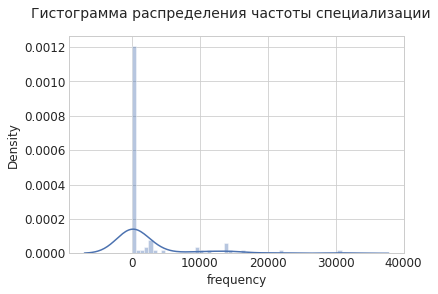

In [119]:
sns.distplot(specialization_frequency.frequency)
plt.suptitle('Гистограмма распределения частоты специализации', size=14)
plt.show()

📌 Мы видим  82 специализации из каталога hh.ru. В каталоге 2 уровня: верхний — профессиональная область и нижний — специализация. Профессиональная область для данного исследования это Информационные технологии, интернет, телеком.  

По гистограмме распределения видно, что нет высокой концентрации вакансий по нескольким специализациям. Наоборот, очень много маленьких групп с частотой специализации от 1 до 6. 

Наибольшее количество упоминаний у специализаций: 1) инженер - 30881, 2) программирование, разработка - 21722, и 3) системы управления предприятием (erp) - 16082. 
Можно сделать умозаключение о спросе на кандидатов с инженерным мышлением/образованием/бэкграундом для разработки с пониманием бизнеса и процессов на предприятиях.

### Анализируем количество и частоту навыков

🎯 Цель: создать таблицу **'skills_frequency'**. <br>
Надо проанализировать данные по тегу 'name'. 

#### Агрегируем по тегу name колонки 'key_skills'

In [76]:
df.key_skills.iloc[1]

"[{'name': 'Информационная безопасность'}, {'name': 'Запуск новых продуктов'}, {'name': 'Анализ рынка'}, {'name': 'Бизнес-анализ'}, {'name': 'Управление продуктом'}, {'name': 'Маркетинговое планирование'}]"

Заменяем вложенные двойные кавычки на символ '|'. это позволит не ловить ошибку и при этом не затрудняет чтение и анализ данных

In [120]:
def text_replace(text):
    return text.replace('"', '|').replace("'", '"')



In [121]:
df['key_skills_jsn'] = df.key_skills.apply(text_replace).apply(text_to_json_dumps)

создаем новый столбец key_skills_name

In [122]:
def get_tag_name_(text):
    try:
        text = json.loads(text)
        out = []
        if len(text) > 2:
            for i in text:
                out.append(i['name'])
            return out
    except:
        return []

In [123]:
df['key_skills_name'] = df.key_skills_jsn.apply(get_tag_name_)

In [124]:
df['key_skills_name'].isna().sum()

9704

None заменяем на 'нет информации'

In [125]:
df['key_skills_name'] = df['key_skills_name'].fillna('нет информации')

создаем таблицу из столбцов 'key_skills_name', 'salary_ru'

In [126]:
skill_salary = df[['key_skills_name', 'salary_from_ru']].explode('key_skills_name')

In [135]:
skill_salary[:3]

,key_skills_name,salary_from_ru
0,Информационная безопасность,"100,000.00"
0,Аудит информационной безопасности,"100,000.00"
0,ФЗ-152,"100,000.00"


In [180]:
(skill_salary
    .groupby('key_skills_name')['salary_from_ru']
    .agg(['count', 'mean', 'median', 'max', 'min'])
    .sort_values(
        ['count', 'mean', 'max', 'min'], ascending=[False, False, False, True]
        )
    [:10])

,count,mean,median,max,min
key_skills_name,,,,,
нет информации,9704,"69,670.94","60,000.00","100,000.00","20,500.00"
SQL,5870,"74,702.40","80,000.00","100,000.00","25,500.00"
Linux,4707,"77,483.41","89,000.00","100,000.00","25,500.00"
Git,4472,"73,517.09","80,000.00","100,000.00","25,500.00"
Английский язык,3179,"79,035.98","89,000.00","100,000.00","27,000.00"
Python,2978,"80,563.50","89,000.00","100,000.00","27,000.00"
JavaScript,2643,"69,553.18","60,000.00","100,000.00","25,500.00"
Работа в команде,2504,"68,862.74","60,000.00","100,000.00","20,500.00"
PostgreSQL,2470,"75,219.29","80,000.00","100,000.00","25,500.00"


📌 Из этой таблицы видно как распределяются скиллы по частоте их упоминания и уровню зарплаты. Наибольшая частота упоминаний у SQL, Linux и Git. Среди лидеров такие языки программирования, как Python и JavaScript.

### Анализируем вакансии в столбце 'name'

Смотрим группировку вакансий по наименованию

Посмотрим ТОП вакансий по столбцу name

In [181]:
df.name.value_counts().loc[lambda x: x>200].reset_index()

,index,name
0,системный администратор,1653
1,программист 1с,1132
2,специалист технической поддержки,478
3,системный аналитик,468
4,аналитик,343
5,инженер-программист,328
6,программист 1c,325
7,графический дизайнер,313
8,инженер технической поддержки,274
9,бизнес-аналитик,269


Посмотрим количество сгруппированных вакансий

In [182]:
df.name.value_counts().loc[lambda x: x>1].sum()

28276

16 тыс. вакансий не сгруппировалось

In [183]:
df.name.value_counts().loc[lambda x: x==1].sum()

15923

объединяем наименования вакансий по ключевым словам

In [197]:
def group_name(text):
    if re.search(r'1с|1c|1 c|1 с', text) is not None:
        text = '1c'
    elif re.search(r'qa|tester|тестер|тестир', text) is not None:
        text = 'qa'
    elif re.search(r'c\+\+|с\+\+|c#|с#', text) is not None:
        text = 'c c+ c#'
    elif re.search(r'sql|postgresql', text) is not None:
        text = 'sql'
    elif re.search(r'java', text) is not None:
        text = 'java'
    elif re.search(r'js|javascript', text) is not None:
        text = 'javascript'
    elif re.search(r'python|питон', text) is not None:
        text = 'python'
    elif re.search(r'devops', text) is not None:
        text = 'devops'
    elif re.search(r'\.net', text) is not None:
        text = '.net'
    elif re.search(r'android', text) is not None:
        text = 'android'
    elif re.search(r'yandex|яндекс|яndex', text) is not None:
        text = 'yandex'
    elif re.search(r'поддерж|support|эксплуат|сервис', text) is not None:
        text = 'support'
    elif re.search(r'secur|безопасн|криминал|защит', text) is not None:
        text = 'security'
    elif re.search(r'data|данны|etl', text) is not None:
        text = 'data'
    elif re.search(r'web|веб|вэб', text) is not None:
        text = 'web'
    elif re.search(r'системный администратор', text) is not None:
        text = 'sysadmin'
    elif re.search(r'системный аналитик|system anal', text) is not None:
        text = 'system analyst'
    elif re.search(r'аналит', text) is not None:
        text = 'аналитик'
    elif re.search(r'prodact|product|продакт|продукт', text) is not None:
        text = 'product'
    elif re.search(r'2d|3d', text) is not None:
        text = '2d 3d'
    elif re.search(r'php', text) is not None:
        text = 'php'
    elif re.search(r'ios', text) is not None:
        text = 'ios'
    elif re.search(r'linux|unix', text) is not None:
        text = 'unix'
    elif re.search(r'fullstack|full stack', text) is not None:
        text = 'fullstack'
    elif re.search(r'front|фронт', text) is not None:
        text = 'frontend'
    elif re.search(r'back', text) is not None:
        text = 'backend'
    elif re.search(r'ui|ux', text) is not None:
        text = 'ui ux'
    elif re.search(r'sap', text) is not None:
        text = 'sap'
    elif re.search(r'erp', text) is not None:
        text = 'erp'
    elif re.search(r'bitrix|битрикс', text) is not None:
        text = 'bitrix'
    else:
        text = 'other'
    return text

In [202]:
df['simple_name'] = df.name.apply(group_name)

In [203]:
salary_name = df[['simple_name', 'salary_from_ru']]

In [204]:
salary_name[:10]

,simple_name,salary_from_ru
0,security,"100,000.00"
1,security,"100,000.00"
2,security,"100,000.00"
3,security,"100,000.00"
4,other,"100,000.00"
5,security,"100,000.00"
6,support,"100,000.00"
7,security,"100,000.00"
8,other,"100,000.00"
9,security,"100,000.00"


In [230]:
sn = (salary_name
    .groupby('simple_name')['salary_from_ru']
    .agg(['count', 'mean', 'median', 'max', 'min'])
    .sort_values(
        ['median', 'count'], ascending=[False, False]
        )
    .reset_index()
)

In [231]:
sn[:5]

,simple_name,count,mean,median,max,min
0,devops,1047,"84,897.18","100,000.00","100,000.00","27,000.00"
1,ui ux,358,"86,196.93","100,000.00","100,000.00","35,000.00"
2,product,196,"87,943.88","100,000.00","100,000.00","35,000.00"
3,qa,2771,"81,610.81","89,000.00","100,000.00","20,500.00"
4,аналитик,2277,"76,432.87","89,000.00","100,000.00","25,500.00"


In [233]:
sn.sort_values('min', ascending=False)[:5]

,simple_name,count,mean,median,max,min
28,erp,38,"69,098.68","60,000.00","100,000.00","40,000.00"
1,ui ux,358,"86,196.93","100,000.00","100,000.00","35,000.00"
2,product,196,"87,943.88","100,000.00","100,000.00","35,000.00"
20,android,435,"69,468.51","62,750.00","100,000.00","35,000.00"
17,ios,415,"71,622.17","65,000.00","100,000.00","35,000.00"


📌 Самые высокие медианы зарплат у специалистов devops, ui/ux и продактов. Следом идут тестировщики и аналитики. У специалистов ERP минимальная зарплата самая высокая среди других групп, правда и их количество всего лишь 38.

### Работаем со столбцом 'experience'

In [78]:
df.experience[0]

"{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}"

вытаскиваем тег name

In [234]:
# добавляем обработку None
def get_tag_experience_name(text):
    if pd.isna(text): 
        clean_text = np.nan
    else:
        clean_text = text.replace("{", '').replace("}", '').split(',')[1][8:]
        if clean_text == 'None':
            clean_text = np.nan

    return clean_text

In [235]:
df['experience_name'] = df.experience.apply(get_tag_experience_name)

In [82]:
df.experience_name.isna().sum()

0

In [236]:
df.experience_name.value_counts().reset_index()

,index,experience_name
0,'От 1 года до 3 лет',23257
1,'От 3 до 6 лет',14405
2,'Нет опыта',5127
3,'Более 6 лет',1410


In [238]:
df.experience_name.value_counts(normalize=True).reset_index()

,index,experience_name
0,'От 1 года до 3 лет',0.53
1,'От 3 до 6 лет',0.33
2,'Нет опыта',0.12
3,'Более 6 лет',0.03


<function matplotlib.pyplot.show(close=None, block=None)>

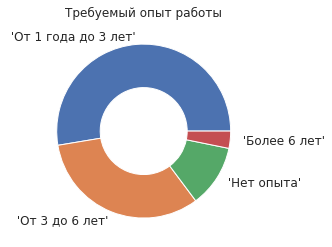

In [237]:
plt.pie(
    df.experience_name.value_counts().values,
    labels=df.experience_name.value_counts().index,
    wedgeprops=dict(width=0.5) # для бублика
    )
plt.title('Требуемый опыт работы')
plt.show

📌 Больше всего вакансий с опытом работы от 1 года до 3-х лет (53%). Для кандидатов без опыта доля вакансий составляет всего 12%.

### Работаем со столбцом 'schedule'

In [85]:
df.schedule[0]

"{'id': 'fullDay', 'name': 'Полный день'}"

вытаскиваем тег name

In [239]:
# добавляем обработку None
def get_tag_schedule_name(text):
    if pd.isna(text): 
        clean_text = np.nan
    else:
        clean_text = text.replace("{", '').replace("}", '').split(',')[1][8:]
        if clean_text == 'None':
            clean_text = np.nan

    return clean_text

In [240]:
df['schedule_name'] = df.schedule.apply(get_tag_schedule_name)

In [89]:
df.schedule_name[1]

" 'Полный день'"

In [90]:
df.schedule_name.isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

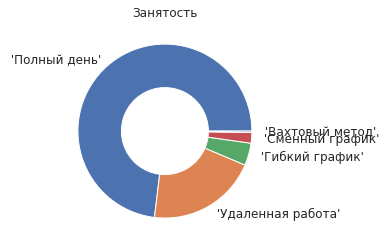

In [241]:
plt.pie(
    df.schedule_name.value_counts().values,
    labels=df.schedule_name.value_counts().index,
    wedgeprops=dict(width=0.5) # для бублика
    )
plt.title('Занятость')
plt.show

In [91]:
df.schedule_name.value_counts()

 'Полный день'         39919
 'Удаленная работа'    10455
 'Гибкий график'        2519
 'Сменный график'       1159
 'Вахтовый метод'        140
Name: schedule_name, dtype: int64

In [242]:
from locale import normalize


df.schedule_name.value_counts(normalize=True)

 'Полный день'        0.73
 'Удаленная работа'   0.21
 'Гибкий график'      0.04
 'Сменный график'     0.02
 'Вахтовый метод'     0.00
Name: schedule_name, dtype: float64

создаем функцию для разделения на 2 категории: 1) полный день 2) все остальное

In [243]:
def fulltime(text):
    if text.find('Полный день') == -1:
        return 0
    else:
        return 1

In [244]:
df['full_time'] = df.schedule_name.apply(fulltime)

In [245]:
df.full_time.value_counts()

1    32302
0    11897
Name: full_time, dtype: int64

In [246]:
df.groupby('full_time')['salary_from_ru'].mean()

full_time
0   70,833.33
1   72,564.72
Name: salary_from_ru, dtype: float64

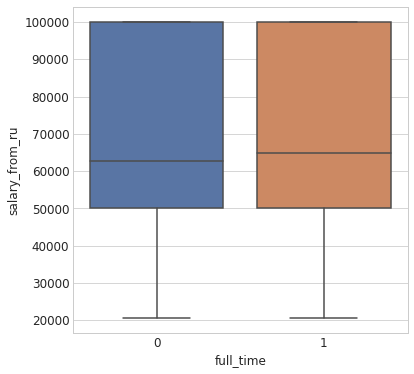

In [248]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='full_time', y='salary_from_ru', data=df)

📌 box plot`ы похожие. Межквартильные интервалы идентичные. Верхние квартили совпадают с максимальным значением выборки. Выбросов нет.

In [250]:
ft = df[['salary_from_ru','full_time']]
ft_0 = ft[ft.full_time == 0]
ft_1 = ft[ft.full_time == 1]

In [251]:
scipy.stats.mannwhitneyu(ft_0.salary_from_ru, ft_1.salary_from_ru)

MannwhitneyuResult(statistic=183782640.0, pvalue=9.179436193665051e-13)

📌 Отклоняем нулевую гипотезу об отсутствии различий между зарплатами по вакансиям на полный день и на part-time. P-value < 0,05

### Создадим dataframe df_stat для анализа средней зарплаты, сгруппированных вакансий, среднего количества скиллов по вакансии. Есть ли связь между данными показателями?

создадим функцию для подсчета количества элементов в списке

In [381]:
def sum_obj(lst):
    return len(lst)

просуммируем количество скиллов по вакансии

In [382]:
df['sum_skills'] = df.key_skills_name.apply(sum_obj)

In [383]:
df.shape

(44199, 27)

подсчитаем среднее количество скиллов по каждой вакансии

In [384]:
df_stat_1 = (df
    .groupby('simple_name')['sum_skills']
    .mean()
    .reset_index()
)

заджойним с sn (salary_name) по столбцу 'simple_name'

In [385]:
df_stat_1 = df_stat_1.merge(sn, on='simple_name',how='inner')

In [386]:
df_stat_1[:2]

,simple_name,sum_skills,count,mean,median,max,min
0,.net,7.38,245,"66,248.15","60,000.00","100,000.00","27,000.00"
1,1c,8.31,4843,"62,179.63","58,000.00","100,000.00","25,500.00"


переименуем столбцы

In [387]:
df_stat_1 = df_stat_1.rename(columns={
                        'mean': 'salary_mean',
                        'count': 'count_simple_name',
                        'sum_skills': 'skills_mean',
                        'median': 'salary_median',
                        'max': 'salary_max',
                        'min': 'salary_min'})

In [388]:
df_stat_1.head()

,simple_name,skills_mean,count_simple_name,salary_mean,salary_median,salary_max,salary_min
0,.net,7.38,245,"66,248.15","60,000.00","100,000.00","27,000.00"
1,1c,8.31,4843,"62,179.63","58,000.00","100,000.00","25,500.00"
2,2d 3d,7.38,341,"82,673.77","89,000.00","100,000.00","33,254.50"
3,android,6.99,435,"69,468.51","62,750.00","100,000.00","35,000.00"
4,backend,7.42,276,"66,795.22","60,000.00","100,000.00","27,000.00"


визуализируем парные зависимости между 3-мя переменными: средней зарплаты по вакансии, количеством той или иной вакансии, средним значением количества скиллов по вакансии.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='salary_mean', ylabel='count_simple_name'>

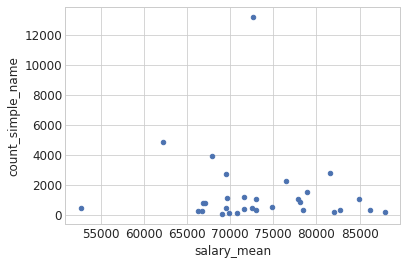

In [355]:
df_stat_1.plot('salary_mean', 'count_simple_name', kind='scatter')

📌 влияние средней зарплаты и количеством вакансии не обнаружено

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='salary_mean', ylabel='skills_mean'>

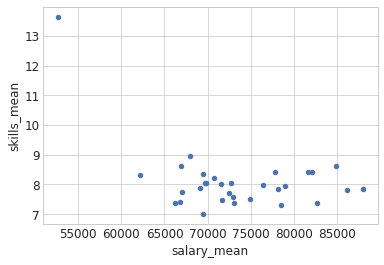

In [356]:
df_stat_1.plot('salary_mean', 'skills_mean', kind='scatter')

📌 влияние средней зарплаты и средним количеством скиллов по вакансии не обнаружено

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='count_simple_name', ylabel='skills_mean'>

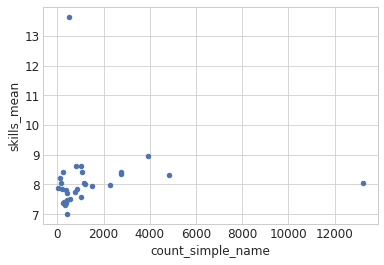

In [357]:
df_stat_1.plot('count_simple_name', 'skills_mean', kind='scatter')

📌 возможно есть определенное влияние количества вакансии и среднего количества скиллов по данной вакансии

уберем выбросы

In [389]:
df_stat_2 = df_stat_1[~df_stat_1.simple_name.isin(['yandex', 'other'])]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='count_simple_name', ylabel='skills_mean'>

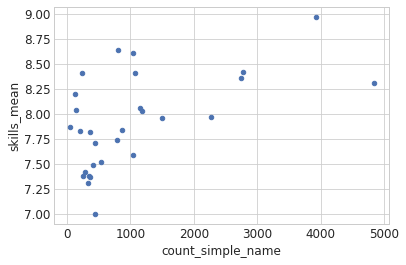

In [390]:
df_stat_2.plot('count_simple_name', 'skills_mean', kind='scatter')

построим график парной регрессии

/home/shulz/.local/share/virtualenvs/learn-data-iW9cjtb-/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


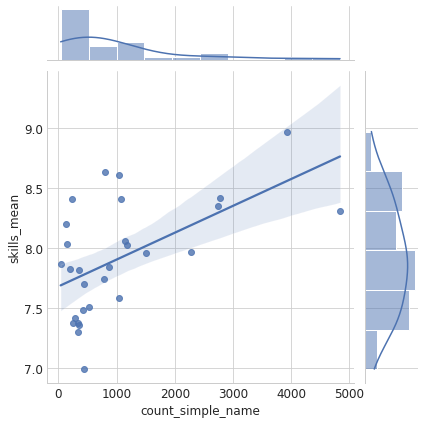

In [391]:
sns.jointplot('count_simple_name', 'skills_mean', data=df_stat_2, kind="reg")

📌 Возможно есть определенная зависимость среднего значения количества скиллов по вакансии от количества вакансий. Облако не плотное вдоль построенной прямой. Доверительный интервал регрессионной функции относительно широкий.
Посмотрим как изменяется среднее значение количества скиллов (skills_mean - целевая переменная) от количества вакансий (count_simple_name - значение фактора).

In [372]:
LR = lm.LinearRegression()

In [392]:
mod1 = LR.fit(df_stat_2[['count_simple_name']], df_stat_2[['skills_mean']])

In [393]:
mod1.intercept_, mod1.coef_

(array([7.682829]), array([[0.00022373]]))

Формула модели:
<skills_mean> = <count_simple_name> x <0.00022373> + <7.682829>

In [394]:
r2 = mod1.score(df_stat_2[['count_simple_name']],df_stat_2[['skills_mean']])
r2

0.31360297534664694

📌 Коэффициент детерминации составляет 31%, что достаточно мало для утверждения о том, что данные показатели основные, влияющие друг на друга.

#### OLS

In [397]:
res_1 = smf.ols('skills_mean ~ count_simple_name', data=df_stat_2).fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            skills_mean   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     12.34
Date:                Wed, 24 Aug 2022   Prob (F-statistic):            0.00158
Time:                        17:56:07   Log-Likelihood:                -13.452
No. Observations:                  29   AIC:                             30.90
Df Residuals:                      27   BIC:                             33.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.6828      0.100     76.939      0.000       7.478       7.888
count_simple_name     0.0002   6.37e-05      3.512      0.002     9.3e-05       0.000
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.848
Skew:                           0.296   Prob(JB):                        0.654
Kurtosis:                       2.406   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

📌 Что мы видим: коэффициент детерминации R-squared равен 31,4% - присутствует определенное влияние факторов, эти факторы возможно связаны функциональной зависимостью.

p-value < 0,05 (0,00158)
что позволяет нам отвергнуть нулевую гипотезу о неадекватности нашей модели.

### ✂ Почистим dataframe от служебных столбцов

In [327]:
df.columns.tolist()

['id',
 'name',
 'salary',
 'schedule',
 'experience',
 'key_skills',
 'specializations',
 'region',
 'specializations_jsn',
 'profarea_id',
 'profarea_id_1',
 'salary_currency',
 'salary_from',
 'salary_temp',
 'salary_from_ru',
 'band_salary',
 'salary_category',
 'specializations_name',
 'key_skills_jsn',
 'key_skills_name',
 'name_agg',
 'name_group',
 'simple_name',
 'experience_name',
 'schedule_name',
 'full_time',
 'sum_skills']

In [398]:
df.drop(
    ['salary',
    'schedule',
    'experience',
    'key_skills',
    'specializations',
    'specializations_jsn',
    'profarea_id',
    'profarea_id_1',
    'salary_currency',
    'salary_from',
    'salary_temp',
    'key_skills_jsn',
    ],
    axis=1,
    inplace=True)

In [399]:
df.head()

,id,name,region,salary_from_ru,band_salary,salary_category,specializations_name,key_skills_name,name_agg,name_group,simple_name,experience_name,schedule_name,full_time,sum_skills
0,50632962,консультант по информационной безопасности,Москва,"100,000.00",от 65 т.р.,4,"[Компьютерная безопасность, Консалтинг, Аутсор...","[Информационная безопасность, Аудит информацио...",security,security,security,'От 1 года до 3 лет','Полный день',1,13
1,46199125,эксперт по компьютерной криминалистике,Москва,"100,000.00",от 65 т.р.,4,"[Компьютерная безопасность, Аналитик, Экономич...","[Английский язык, Информационная безопасность,...",security,security,security,'От 3 до 6 лет','Полный день',1,6
2,54741969,главный специалист по информационной безопасности,Москва,"100,000.00",от 65 т.р.,4,"[Компьютерная безопасность, Сетевые технологии...","[Аудит безопасности, Информационная безопаснос...",security,security,security,'От 1 года до 3 лет','Полный день',1,9
3,66092878,архитектор по направлению информационная безоп...,Москва,"100,000.00",от 65 т.р.,4,"[Компьютерная безопасность, Сетевые технологии...","[Английский язык, Проведение презентаций, Прое...",security,security,security,'От 3 до 6 лет','Полный день',1,30
4,66091406,дежурный сетевой инженер,Москва,"100,000.00",от 65 т.р.,4,"[Компьютерная безопасность, Сетевые технологии...","[Сетевые технологии, CCNA, CCNP, Linux, VMware...",other,other,other,'От 1 года до 3 лет','Сменный график',0,6


📌 Мы провели первичный анализ датасета и анализ колонок. Очистили датасет от данных, не относящихся к IT.

Вытащили данные по начальной зарплате (salary from). Привели все зарплаты к единой валюте (RUR). Пустые ячейки заполнили медианными значениями зарплаты в зависимости от региона. После заполнения пустых ячеек медиана по зарплате снизилась с 76000 р. до 65000. Это говорит о том, что пустые ячейки по зарплатам были в регионах с более низким уровнем зарплаты.
В лидерах по уровню зарплаты регионы Москва, Санкт-Петербург, Адыгея (данный регион скорее всего попал в топ случайно). В аутсайдерах регионы Северного Кавказа.
Средняя медиана по стране составляет 46 тыс.руб. Самые высокие медианы зарплат у специалистов devops, ui/ux и продактов ( по 100 т.руб.). Следом идут тестировщики и аналитики (по 89 т.руб.). У специалистов ERP минимальная зарплата самая высокая среди других групп, правда и их количество всего лишь 38

Построенная гистограмма распределения частоты специализации показывает отсутствие концентрации вакансий по нескольким специализациям.  Наоборот, очень много маленьких групп с частотой специализации от 1 до 6. Наибольшее количество упоминаний у специализаций: 1) инженер - 30881, 2) программирование, разработка - 21722, и 3) системы управления предприятием (erp) - 16082. 
Можно сделать умозаключение о спросе на кандидатов с инженерным мышлением/образованием/бэкграундом для разработки с пониманием бизнеса и процессов на предприятиях.

Больше всего вакансий с опытом работы от 1 года до 3-х лет (53%). Для кандидатов без опыта доля вакансий составляет всего 12%. 
Занятость на полный день преобладает в вакансиях (73%). Несмотря на похожесть boxplot с вакансиями на полный рабочий день и остальных, анализ по критерию Манна-Уитни позволил отклонить нулевую гипотезу об отсутствии различий между зарплатами по вакансиям на полный день и на part-time.

Построили модель линейной регресии, показывающую как изменяется среднее значение количества скиллов по вакансии от количества вакансий. Был подсчитан коэффициент детерминации, который составил 31%, что достаточно мало для утверждения о том, что данные показатели основные, влияющие друг на друга. При этом p-value составил 0,00158, что позволило нам отвергнуть нулевую гипотезу о неадекватности нашей модели.

